In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

headlines = [
    "El mercado de valores sube hoy",
    "La economía global enfrenta desafíos, las tasas de interés aumentan",
    "Nuevas tecnologías emergen en el sector financiero",
    "El equipo local pierde el campeonato",
    "El jugador estrella anota un gol decisivo",
    "La temporada de fútbol comienza con emoción",
    "La política internacional se vuelve tensa",
    "Las elecciones presidenciales se acercan, la tensión aumenta",
    "Nuevas políticas económicas propuestas por el gobierno, se endurecen las regulaciones",
    "Las empresas tecnológicas lanzan nuevos productos, el futuro es prometedor",
    "Innovaciones en inteligencia artificial transforman industrias",
    "El avance de la robótica en la manufactura y la producción, mejora la eficiencia",
]

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words_es = stopwords.words('spanish')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=stop_words_es)
X = vectorizer.fit_transform(headlines)

In [ ]:
# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

for i, headline in enumerate(headlines):
    print(f"Cluster {labels[i]}: {headline}")

X_reduced = PCA(n_components=2).fit_transform(X.toarray())
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='Accent', s=100)
for i, headline in enumerate(headlines):
    plt.annotate(f"{i}", (X_reduced[i, 0], X_reduced[i, 1]+0.02))
plt.title("News Headlines Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [ ]:
X

# Clustering PDF

In [ ]:
import os
import fitz  # PyMuPDF
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#download stopwords
nltk.download('stopwords')
stop_words_es = stopwords.words('spanish')

docs_folder = r"C:\Users\erangel\Documents\FundamentosIA\PDFs"



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erangel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
def extract_text_from_pdfs(file_path):
    text = ""
    doc = fitz.open(file_path)
    for page in doc:
        text += page.get_text()
    return text

# Load and extract text from PDFs
docs = []
doc_names = []

for file in os.listdir(docs_folder):
    if file.endswith(".pdf"):
        file_path = os.path.join(docs_folder, file)
        text = extract_text_from_pdfs(file_path)
        docs.append(text)
        doc_names.append(file)

# Vectorization
vectorizer = TfidfVectorizer(stop_words=stop_words_es)
X = vectorizer.fit_transform(docs)

Cluster 2: Algoritmos-y-Estructuras-de-Datos-Autor-Bottazzi-Cristian-Costarelli-Santiago-y-D-Elia-Jorge.pdf
Cluster 5: Algoritmos-y-programacion-Autor-Juan-Carlos-Lopez-Garcia.pdf
Cluster 2: Apuntes-de-Estructuras-de-Datos-y-Algoritmos-Autor-Javier-Campos.pdf
Cluster 0: Enfoques-Teorias-y-Perspectivas-de-la-Ingenieria-de-Sistema-y-sus-Programas-Academicos-Jhon-Jaime-Mendez-Alandete-Ingrid-Johana-Romero-Lazaro.pdf
Cluster 3: TireWarrantySummary_En_USCA_1.2022 (2).pdf
Cluster 3: TireWarrantySummary_En_USCA_1.2022.pdf
Cluster 4: US VW Collision Brochure.pdf
Cluster 4: US VW Collision Brochure_MY25.pdf
Cluster 1: USA_VW_MY13_WM_131.5U3.WTM.23_EN.pdf
Cluster 1: USA_VW_MY26_WM_26VWGASWMUSENV3_ENG_Final_UPGUpload.pdf


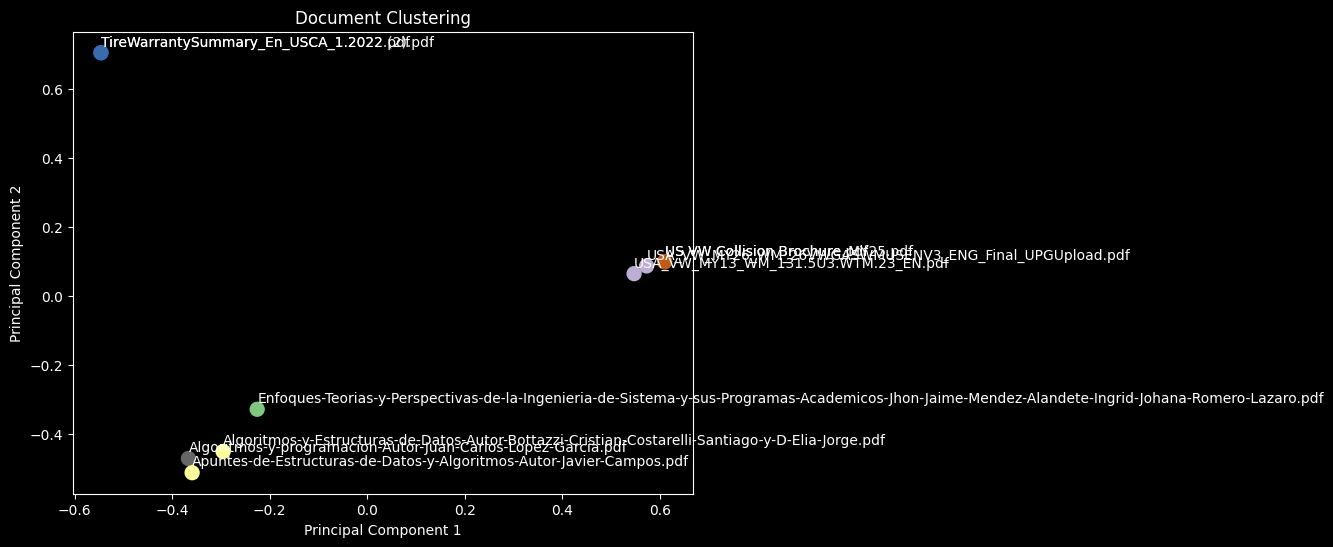

In [20]:
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(X)

for i, doc_name in enumerate(doc_names):
    print(f"Cluster {labels[i]}: {doc_name}")

X_reduced = PCA(n_components=2).fit_transform(X.toarray())
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='Accent', s=100)
for i, doc_name in enumerate(doc_names):
    plt.annotate(doc_name, (X_reduced[i, 0], X_reduced[i, 1]+0.02))
plt.title("Document Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()